<a href="https://colab.research.google.com/github/priya4328/Classification-Models/blob/main/diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express  as px
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE

In [ ]:
df=pd.read_excel('/content/diabetes.xlsx')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

There are 768 rows and 9 columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There is no null values present in the dataset

In [ ]:
df['Age'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68])

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Rename the Outcome to Diabetic

In [ ]:
df=df.rename(columns={'Outcome':'Diabetic'})

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetic
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploratory Data Analysis

In [ ]:
df['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

In [ ]:
df['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [ ]:
fig1 = px.histogram(df, x = 'Pregnancies', marginal = 'box',
                    title = 'Distribution of pregnant womens ',
                    labels = {'x': 'Dollar($)', 'y': 'Number of Womens'},
                   color_discrete_sequence=px.colors.qualitative.Antique)
fig1.show()

Here we see that Pregnancies feature is left skewed.maximum women pregnant 0 to 4 times.

In [ ]:
df['Glucose'].unique()

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190])

In [ ]:
fig1 = px.histogram(df, x = 'Glucose', marginal = 'box',
                    title = 'Distribution of Glucose of petients',
                    labels = {'x': 'Dollar($)', 'y': 'Glucose'},
                   color_discrete_sequence=px.colors.qualitative.Antique)
fig1.show()

It is found that Glucose feature is left skewed, middle 50% of value lie between 99 to 140.5 . maximum is 199

Giving range to the glucose level

No Diabetic (0 to 100 mg/dL) = 1

Prediabetic (101 to 125 mg/dL) = 2

Diabetes or High diabetes (126 to 199 mg/dL) = 3

In [ ]:
def gluc(x):
  if x in range(0,100):
    return 1
  elif x in range(100,125):
    return 2
  elif x in range(125,200):
    return 3
df['Glucose'] =df.Glucose.apply(gluc)

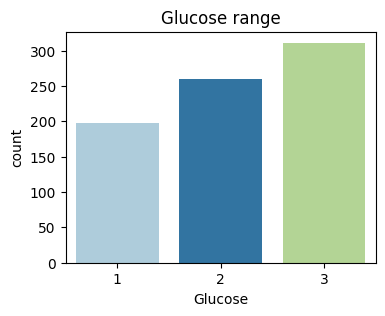

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(data=df,x='Glucose',palette='Paired')
plt.title('Glucose range')
plt.show()

according to countplot maximum number of patients fall in range 3 whose glucose level lies in 125mg/dl to 200mg/dl.


check number of patients according to Age

In [ ]:
df['Age'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68])

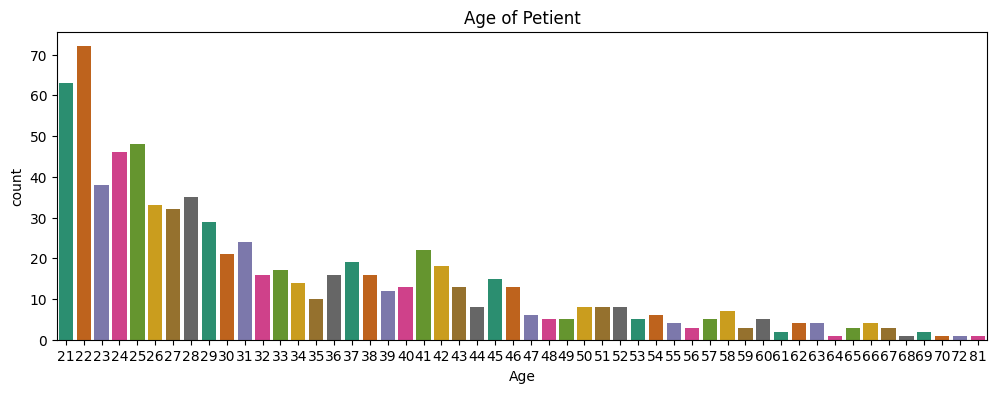

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(data = df, x = 'Age', palette = 'Dark2')
plt.xlabel('Age')
plt.title('Age of Petient');

 maximum age of petient 22 and minimum is 81

patient according to BloodPressure

In [ ]:
df['BloodPressure'].unique()

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114])

In [ ]:
df['BloodPressure'].value_counts()

70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: BloodPressure, dtype: int64

In [ ]:
df['BloodPressure'].unique()

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114])

In [ ]:
def bp(x):
  if x in range(0,90):
    return 1
  elif x in range(90,120):
    return 2
  elif x in range(120,130):
    return 3
df['BloodPressure']=df['BloodPressure'].apply(bp)

BloodPressure range

1=low BP

2=Normal

3=high

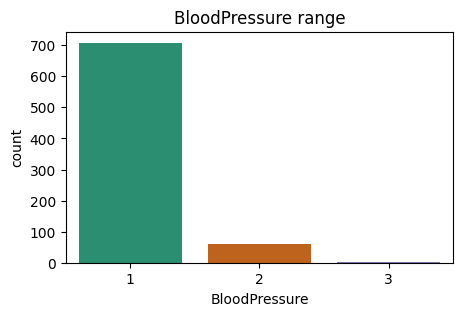

In [ ]:
plt.figure(figsize = (5,3))
sns.countplot(data = df, x = 'BloodPressure', palette = 'Dark2')
plt.xlabel('BloodPressure')
plt.title('BloodPressure range');

Maximum number of patient's bloodpressure lies between 0 to 90

check the patients according to age

In [ ]:
df['Age'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68])

In [ ]:
fig2 = px.histogram(df, x = 'Age', marginal = 'box',
                    title = 'number of patients by Age',
                    labels = {'x': 'Dollar($)', 'y': 'Age'},
                   color_discrete_sequence=px.colors.qualitative.D3,
                   nbins = 75)
fig2.update_traces(marker_line_width=1,marker_line_color="white")

fig2.show()


"The age distribution reveals a right-skewed pattern, with the central 50% concentrated between 24 and 41 years, encompassing most patients."

In [ ]:
df['SkinThickness'].unique()

array([35, 29,  0, 23, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11, 31,
       37, 42, 25, 18, 24, 39, 27, 21, 34, 10, 60, 13, 20, 22, 28, 54, 40,
       51, 56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99])

Skin Thickness = The average thickness of human skin is 2 mm, but it can range from 0.3–2.6 mm depending on the body part. For example, skin on the eyelids is 0.5 mm thick, while the heels of the feet are 4 mm thick. The epidermis is thinnest on the eyelids (0.05 mm) and thickest on the palms and soles (1.5 mm).

In [ ]:
fig1 = px.histogram(df, x = 'SkinThickness', marginal = 'box',
                    title = 'People Skin Thickness',
                    labels = {'x': 'Skin Thickness', 'y': 'count'},
                   color_discrete_sequence=px.colors.qualitative.Antique)
fig1.show()

This Graph says that the maximum number of people having the less Skin Thickness, but the maximum number of people is has skin thickness in the range of 10 to 44.

Diabetes Pedigree Function(DPF) = It is a function that calculates the likelihood of diabetes based on a person's age and family history of diabetes. The realistic range for DPF is 0.08 to 2.42, and the realistic range for age is 21 to 81. In the target variable, 0 represents healthy people, and 1 represents those with diabetes.

In [ ]:
# DiabetesPedigreeFunction

fig1 = px.histogram(df, x = 'DiabetesPedigreeFunction', marginal = 'box',
                    title = 'Diabetes Pedigree Function of an Individuals',
                    labels = {'x': 'DPF', 'y': 'count'},
                   color_discrete_sequence=px.colors.qualitative.Antique)
fig1.show()

In [ ]:
df.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetic
0,6,148,1,35,0,33.6,0.627,2,1


check the outliers by boxplot

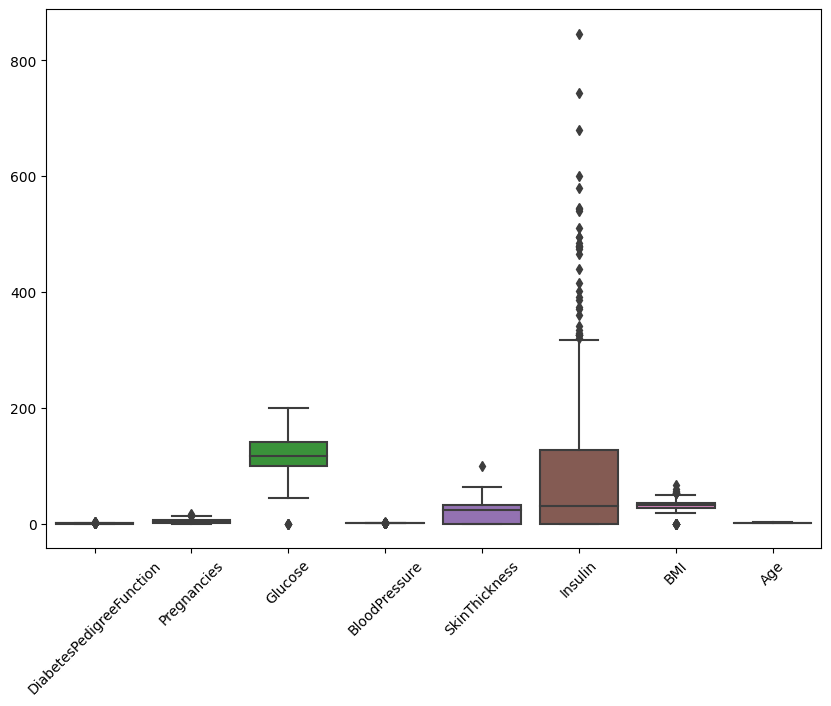

In [ ]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=45)
sns.boxplot(data=df[['DiabetesPedigreeFunction','Pregnancies', 'Glucose','BloodPressure', 'SkinThickness', 'Insulin', 'BMI','Age']])
plt.show()

maximum number of outlier present in insulin column

Check The Outlier by (IQR method)

In [ ]:

for i in df.columns:

    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)

    IQR = q3 - q1
    UL = q3 + 1.5*IQR
    LL = q1 - 1.5*IQR

    print('IQR of',i,'= ',IQR)
    print('UL of',i,'= ',UL)
    print('LL of',i,'= ',LL)
    print('Number of Outliers in',i,' = ',(df.shape[0] - df[(df[i]<UL) & (df[i]>LL)].shape[0]))
    print(' ')

IQR of Pregnancies =  5.0
UL of Pregnancies =  13.5
LL of Pregnancies =  -6.5
Number of Outliers in Pregnancies  =  4
 
IQR of Glucose =  41.25
UL of Glucose =  202.125
LL of Glucose =  37.125
Number of Outliers in Glucose  =  5
 
IQR of BloodPressure =  0.0
UL of BloodPressure =  1.0
LL of BloodPressure =  1.0
Number of Outliers in BloodPressure  =  768
 
IQR of SkinThickness =  32.0
UL of SkinThickness =  80.0
LL of SkinThickness =  -48.0
Number of Outliers in SkinThickness  =  1
 
IQR of Insulin =  127.25
UL of Insulin =  318.125
LL of Insulin =  -190.875
Number of Outliers in Insulin  =  34
 
IQR of BMI =  9.3
UL of BMI =  50.550000000000004
LL of BMI =  13.35
Number of Outliers in BMI  =  19
 
IQR of DiabetesPedigreeFunction =  0.38249999999999995
UL of DiabetesPedigreeFunction =  1.2
LL of DiabetesPedigreeFunction =  -0.32999999999999996
Number of Outliers in DiabetesPedigreeFunction  =  29
 
IQR of Age =  1.0
UL of Age =  3.5
LL of Age =  -0.5
Number of Outliers in Age  =  0
 
I

Bifurcate into diabetic patients and Non-diabetic patients

In [ ]:
mi0 = df[df['Diabetic']==0]
mi1 = df[df['Diabetic']==1]

1=diabetic
0=Non diabetic

In [ ]:
mi0.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetic
1,1,85,1,29,0,26.6,0.351,2,0
3,1,89,1,23,94,28.1,0.167,1,0
5,5,116,1,0,0,25.6,0.201,2,0


In [ ]:
mi1.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetic
0,6,148,1,35,0,33.6,0.627,2,1
2,8,183,1,0,0,23.3,0.672,2,1


Distribution Plot:

In [ ]:
con_col=['Pregnancies','Glucose','BloodPressure', 'SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction']

<ipython-input-31-7edd0d157e16>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-31-7edd0d157e16>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




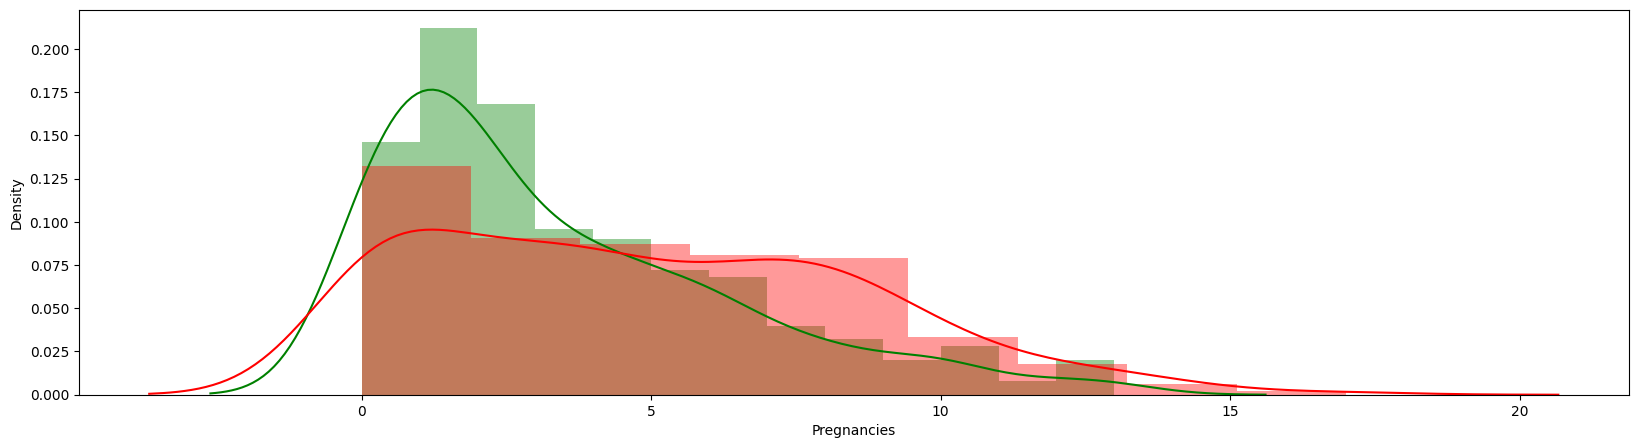

<ipython-input-31-7edd0d157e16>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-31-7edd0d157e16>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




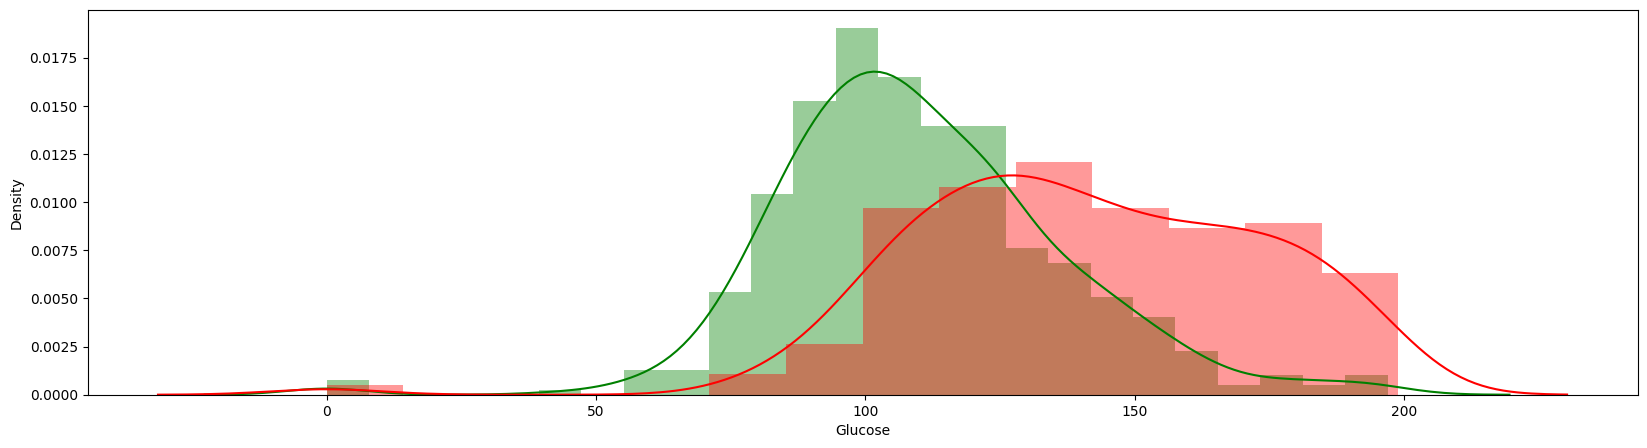

<ipython-input-31-7edd0d157e16>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-31-7edd0d157e16>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




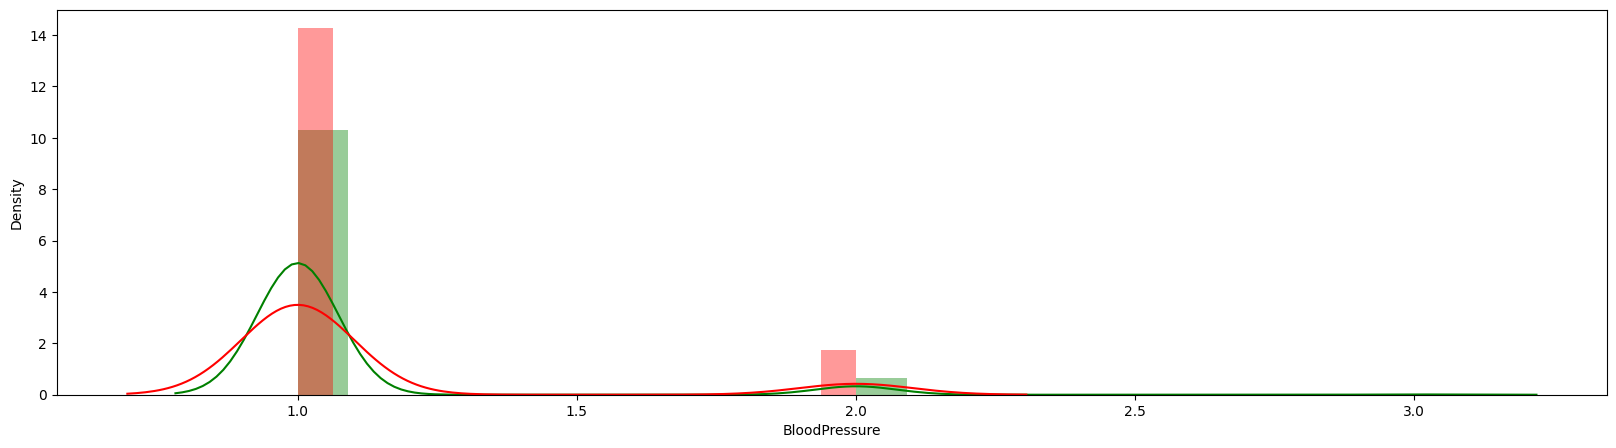

<ipython-input-31-7edd0d157e16>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-31-7edd0d157e16>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




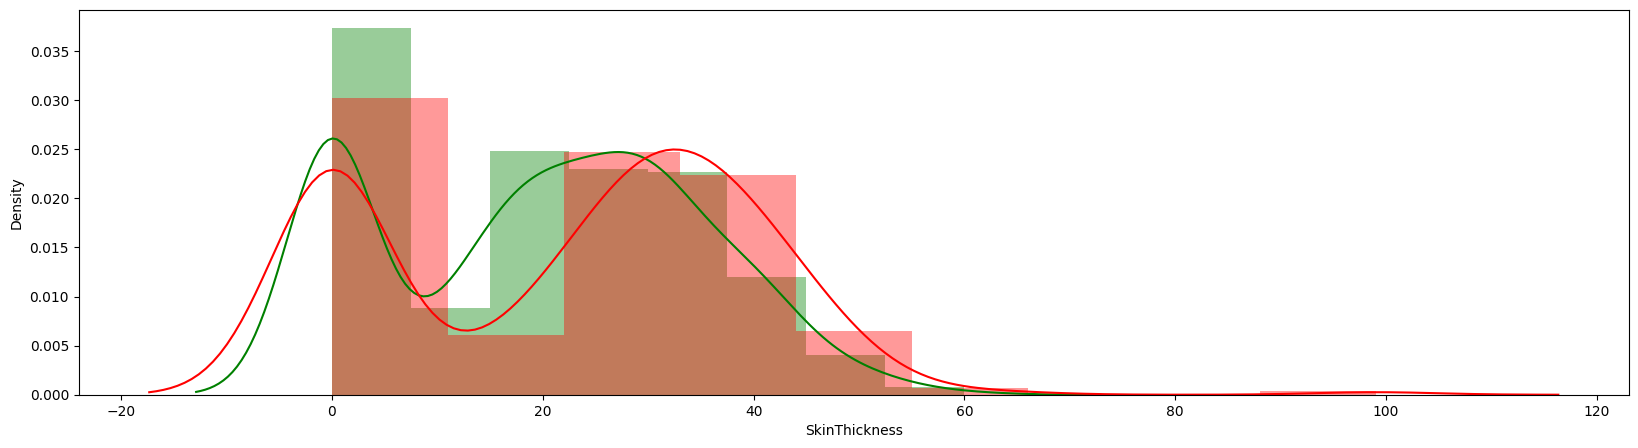

<ipython-input-31-7edd0d157e16>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-31-7edd0d157e16>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




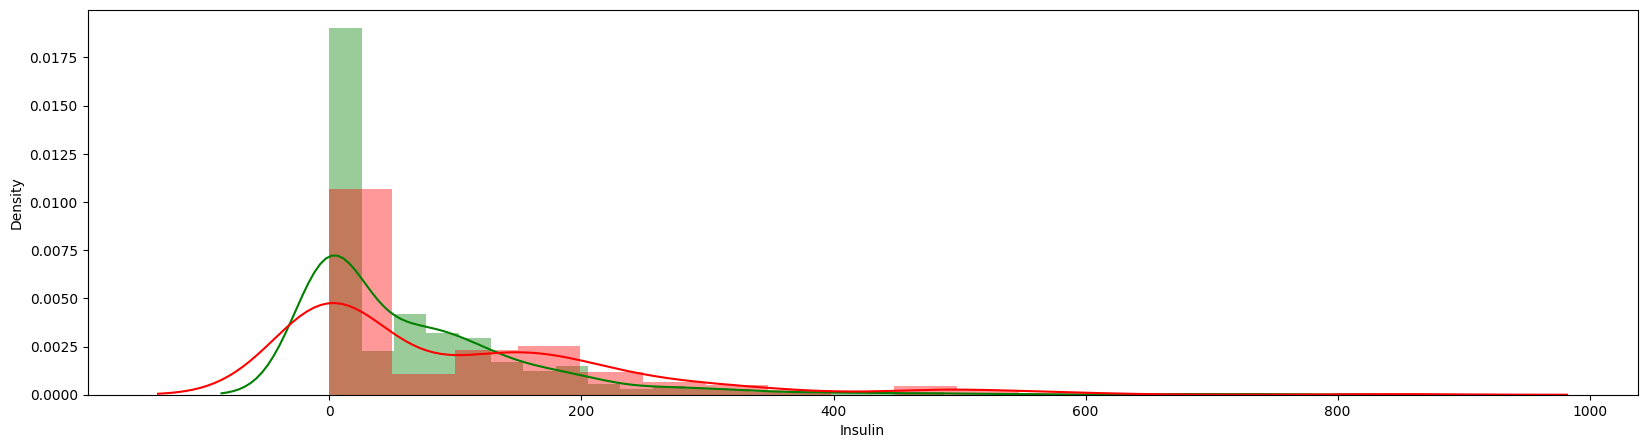

<ipython-input-31-7edd0d157e16>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-31-7edd0d157e16>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




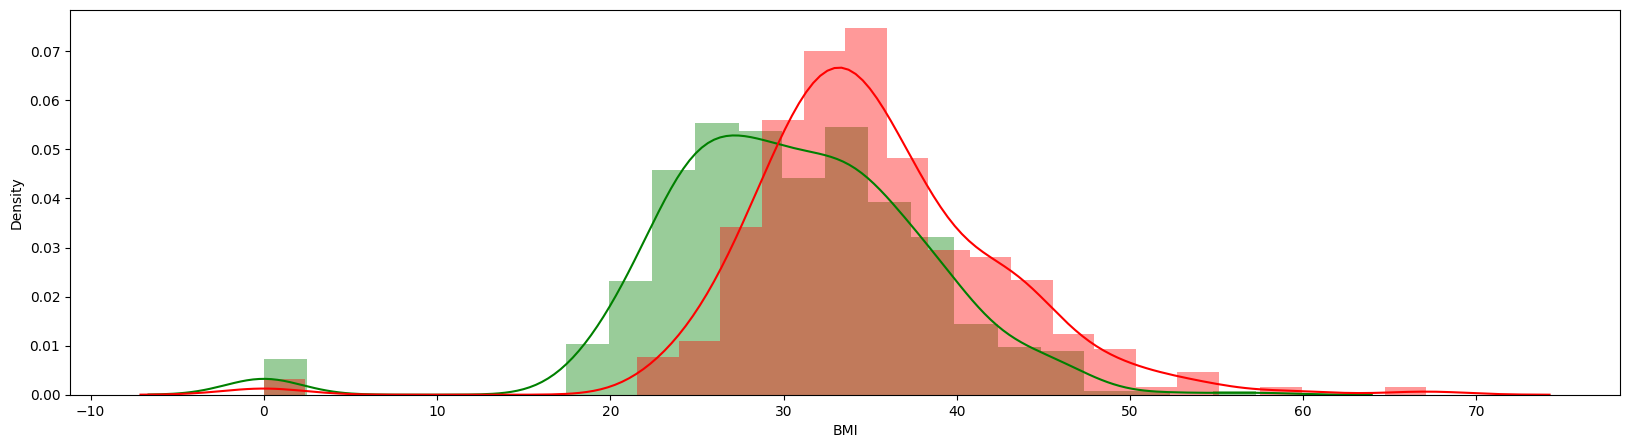

<ipython-input-31-7edd0d157e16>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-31-7edd0d157e16>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




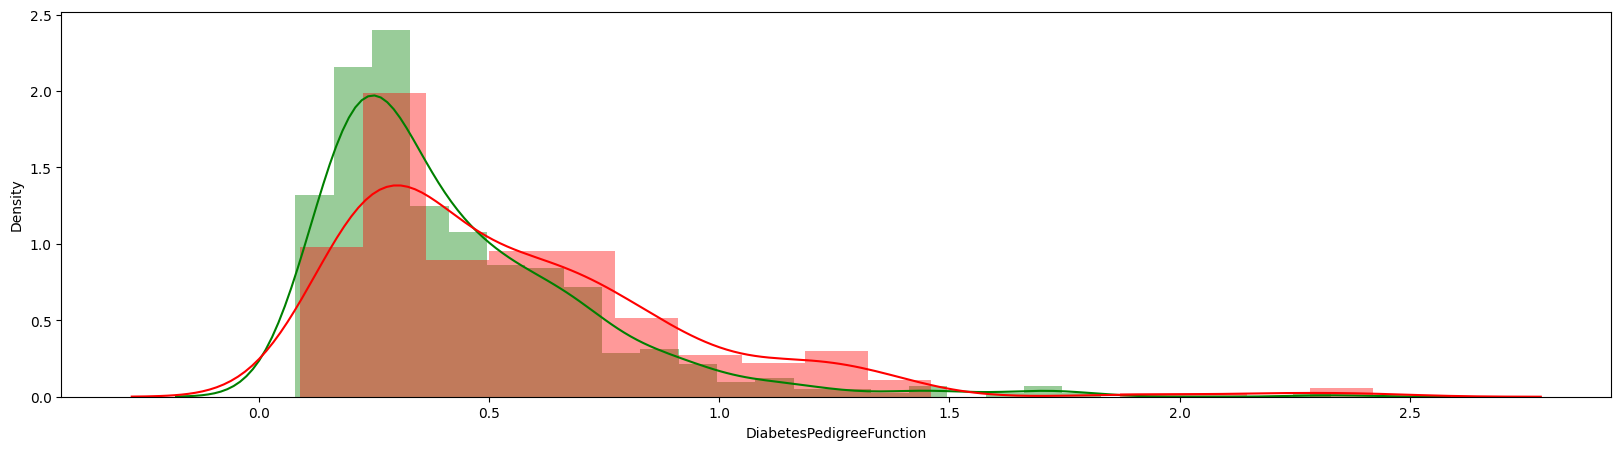

In [ ]:
for i in con_col:
    plt.figure(figsize=(20,5))
    sns.distplot(mi0[i],color='g')
    sns.distplot(mi1[i],color='r')
    plt.show()

HEAT MAP

In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetic
Pregnancies,1.000000,0.129459,0.075110,-0.081672,-0.073535,0.017683,-0.033523,0.536070,0.221898
Glucose,0.129459,1.000000,0.126979,0.057328,0.331357,0.221071,0.137337,0.239283,0.466581
BloodPressure,0.075110,0.126979,1.000000,-0.031381,-0.029038,0.122065,-0.033889,0.146947,0.076575
SkinThickness,-0.081672,0.057328,-0.031381,1.000000,0.436783,0.392573,0.183928,-0.111270,0.074752
Insulin,-0.073535,0.331357,-0.029038,0.436783,1.000000,0.197859,0.185071,-0.061198,0.130548
BMI,0.017683,0.221071,0.122065,0.392573,0.197859,1.000000,0.140647,0.035902,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,-0.033889,0.183928,0.185071,0.140647,1.000000,0.050338,0.173844
Age,0.536070,0.239283,0.146947,-0.111270,-0.061198,0.035902,0.050338,1.000000,0.246393
Diabetic,0.221898,0.466581,0.076575,0.074752,0.130548,0.292695,0.173844,0.246393,1.000000


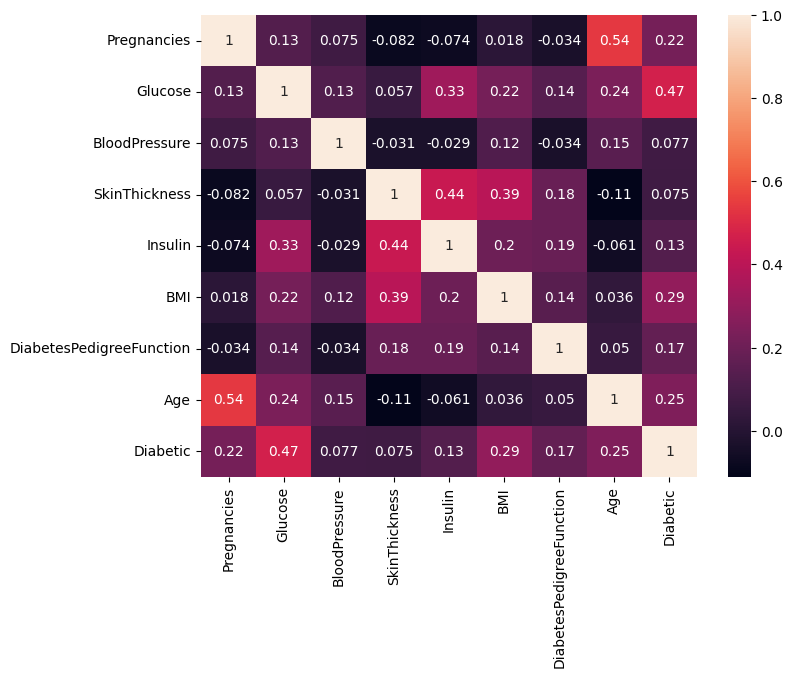

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

In this heat map Age and Pregnancies  correlate

Splitting dataset in dependent and independent variable

In [ ]:
X =df.drop('Diabetic',axis=1)
y = df['Diabetic']

Splitting dataset into train and test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Checking balancing of the data:

0    65.104167
1    34.895833
Name: Diabetic, dtype: float64


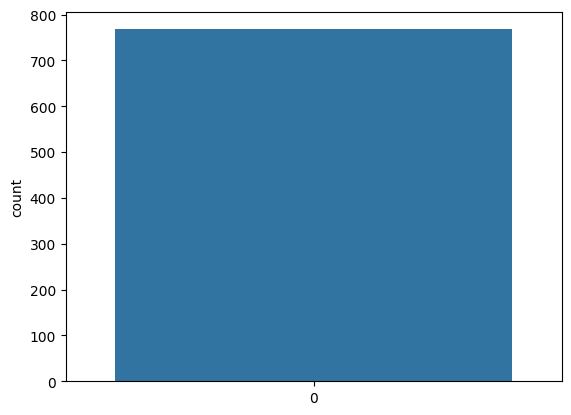

In [ ]:
print((df['Diabetic'].value_counts()/df['Diabetic'].shape)*100)
sns.countplot(df['Diabetic'])
plt.show()

the data is balanced

Implement the Model

## **LogisticRegression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

logistic = LogisticRegression(random_state = 42)
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)
acc_1=accuracy_score(y_test, y_pred)
accuracy1=round(acc_1*100,2)
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)
print(accuracy1)

Confusion Matrix : 
 [[130  16]
 [ 32  53]]
79.22


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
print(classification_report(y_test,y_pred))
print('The accuracy score of logistic regression is {}%'.format(accuracy1))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       146
           1       0.77      0.62      0.69        85

    accuracy                           0.79       231
   macro avg       0.79      0.76      0.77       231
weighted avg       0.79      0.79      0.79       231

The accuracy score of logistic regression is 79.22%


## **KNN(K Nearest Neighbour)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k_neighbors = KNeighborsClassifier()
k_neighbors.fit(X_train,y_train)
y_pred2 = k_neighbors.predict(X_test)
acc_2 = accuracy_score(y_test, y_pred2)
accuracy2=round(acc_2*100,2)
print(classification_report(y_test,y_pred))
print('The accuracy score of k nearest neighbors is {}%'.format(accuracy2))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       146
           1       0.77      0.62      0.69        85

    accuracy                           0.79       231
   macro avg       0.79      0.76      0.77       231
weighted avg       0.79      0.79      0.79       231

The accuracy score of k nearest neighbors is 74.46%


## **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
y_pred4 = decision_tree.predict(X_test)
acc_4 = accuracy_score(y_test, y_pred4)
score4 = round(acc_4*100,2)
print(classification_report(y_test,y_pred))

print('The accuracy score of Decision tree is {}%'.format(score4))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       146
           1       0.77      0.62      0.69        85

    accuracy                           0.79       231
   macro avg       0.79      0.76      0.77       231
weighted avg       0.79      0.79      0.79       231

The accuracy score of Decision tree is 71.86%


## **RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state = 42)
random_forest.fit(X_train, y_train)

ran = random_forest.predict(X_train)

y_pred5 = random_forest.predict(X_test)
acc_5 = accuracy_score(y_test, y_pred5)
score5 = round(acc_5*100,2)
print(classification_report(y_test,y_pred))
print('The accuracy score of random forest is {}%'.format(score5))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       146
           1       0.77      0.62      0.69        85

    accuracy                           0.79       231
   macro avg       0.79      0.76      0.77       231
weighted avg       0.79      0.79      0.79       231

The accuracy score of random forest is 80.52%
